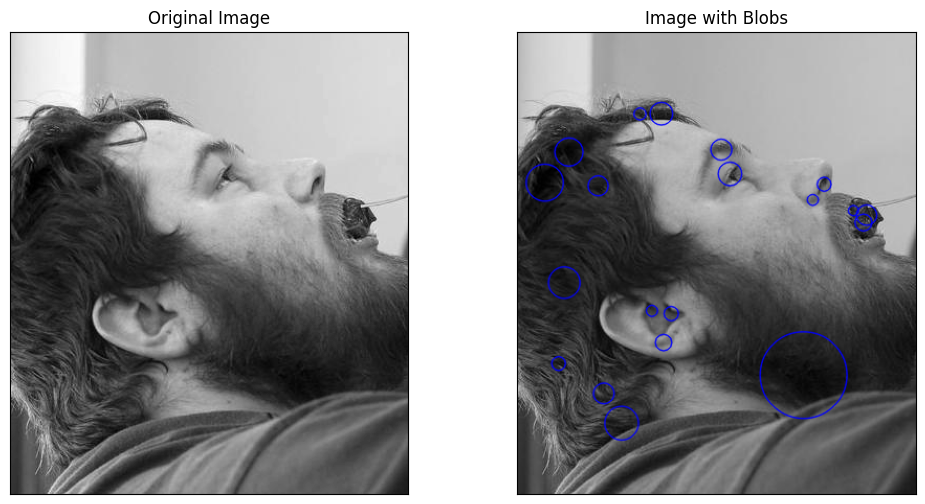

Total blobs detected: 20
Blob 1:
Position: (x=26.04, y=143.65)
Radius: 17.66
Area: 980.33

Blob 2:
Position: (x=49.07, y=114.29)
Radius: 13.51
Area: 573.39

Blob 3:
Position: (x=273.14, y=327.76)
Radius: 41.44
Area: 5394.23

Blob 4:
Position: (x=44.63, y=239.30)
Radius: 15.03
Area: 709.31

Blob 5:
Position: (x=99.46, y=373.73)
Radius: 16.08
Area: 812.03

Blob 6:
Position: (x=39.27, y=316.66)
Radius: 6.62
Area: 137.88

Blob 7:
Position: (x=77.04, y=146.71)
Radius: 9.53
Area: 285.52

Blob 8:
Position: (x=137.35, y=77.69)
Radius: 10.82
Area: 367.68

Blob 9:
Position: (x=82.41, y=345.29)
Radius: 9.90
Area: 307.81

Blob 10:
Position: (x=330.41, y=181.77)
Radius: 8.11
Area: 206.59

Blob 11:
Position: (x=128.38, y=266.34)
Radius: 5.43
Area: 92.75

Blob 12:
Position: (x=333.37, y=174.66)
Radius: 9.77
Area: 299.91

Blob 13:
Position: (x=320.81, y=170.40)
Radius: 4.87
Area: 74.62

Blob 14:
Position: (x=116.96, y=77.88)
Radius: 5.74
Area: 103.69

Blob 15:
Position: (x=146.84, y=268.95)
Radius: 6.

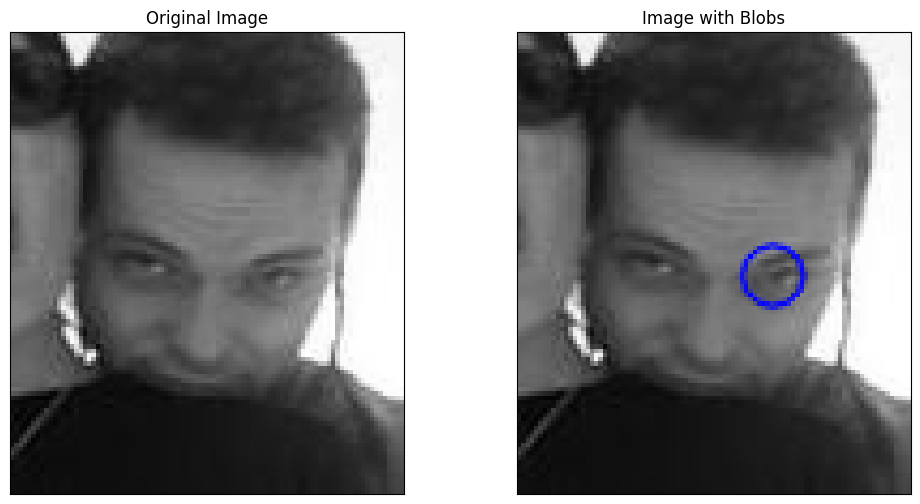

Total blobs detected: 1
Blob 1:
Position: (x=59.26, y=56.51)
Radius: 7.10
Area: 158.40



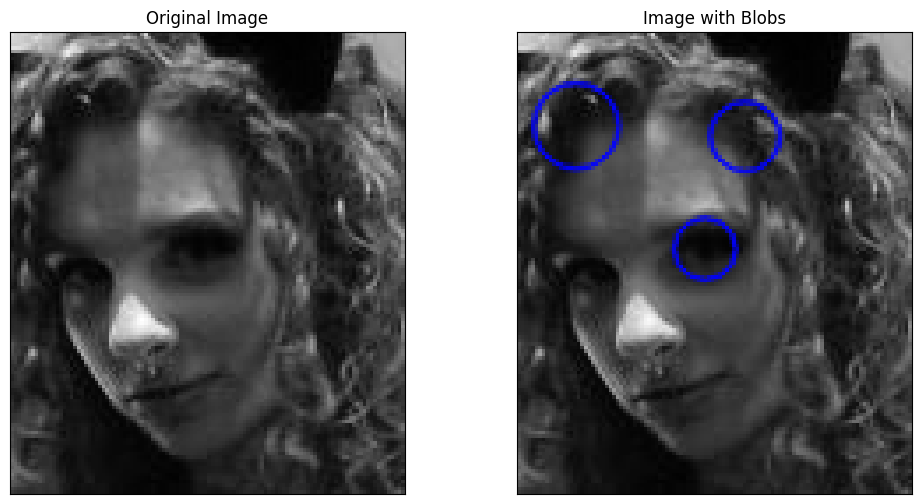

Total blobs detected: 3
Blob 1:
Position: (x=52.82, y=61.04)
Radius: 8.76
Area: 241.26

Blob 2:
Position: (x=16.30, y=26.16)
Radius: 12.07
Area: 457.81

Blob 3:
Position: (x=64.16, y=29.12)
Radius: 9.82
Area: 302.88



In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

def detect_blobs_and_stats(image_path):
    img = Image.open(image_path)
    grayscale = img.convert('L')
    img_np = np.array(grayscale)

    params = cv2.SimpleBlobDetector_Params()

    params.minThreshold = 10
    params.maxThreshold = 200
    params.thresholdStep = 10

    params.filterByArea = True
    params.minArea = 50
    params.maxArea = 5000

    # params.filterByCircularity = True
    # params.minCircularity = 0.1

    params.filterByConvexity = True
    params.minConvexity = 0.5

    # params.filterByInertia = True
    # params.minInertiaRatio = 0.1

    params.minDistBetweenBlobs = 10

    detector = cv2.SimpleBlobDetector_create(params)

    keypoints = detector.detect(img_np)

    blank = np.zeros((1, 1))
    blobs = cv2.drawKeypoints(img_np, keypoints, blank, (0, 0, 255),
                              cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(grayscale, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(blobs)
    plt.title(f'Image with Blobs'), plt.xticks([]), plt.yticks([])
    plt.show()

    print(f"Total blobs detected: {len(keypoints)}")

    for i, keypoint in enumerate(keypoints):
        x, y = keypoint.pt
        radius = keypoint.size / 2
        area = np.pi * (radius ** 2)
        print(f"Blob {i + 1}:")
        print(f"Position: (x={x:.2f}, y={y:.2f})")
        print(f"Radius: {radius:.2f}")
        print(f"Area: {area:.2f}")
        print("")

detect_blobs_and_stats("./cropped_faces/cropped_face_6_1.jpg")
detect_blobs_and_stats("./cropped_faces/cropped_face_9_1.jpg")
detect_blobs_and_stats("./cropped_faces/cropped_face_3_1.jpg")
